In [1]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
sns.set()
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

### Model selection

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [2]:
# Read the data:
with open("./assets/preprocessing_results.pkl", mode="rb") as file_bin:
    resulst = pickle.load(file_bin)

In [3]:
# Unpack train and test sets:
X_train, X_test, y_train, y_test = resulst.values()

In [4]:
# Define a scoring function:
r2 = make_scorer(r2_score, greater_is_better=True)
rmse = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

For dummy_reg, results are:
  min = -0.00
  mean = -0.00
  max = -0.00

For linear_reg, results are:
  min = 0.62
  mean = 0.64
  max = 0.66

For knn_reg, results are:
  min = 0.66
  mean = 0.69
  max = 0.71

For tree_reg, results are:
  min = 0.63
  mean = 0.65
  max = 0.66

For adaboost_knn_reg, results are:
  min = 0.54
  mean = 0.56
  max = 0.59

For adaboost_tree_reg, results are:
  min = 0.80
  mean = 0.81
  max = 0.83

For random_forest_reg, results are:
  min = 0.80
  mean = 0.81
  max = 0.83

For xgb_reg, results are:
  min = 0.81
  mean = 0.82
  max = 0.84



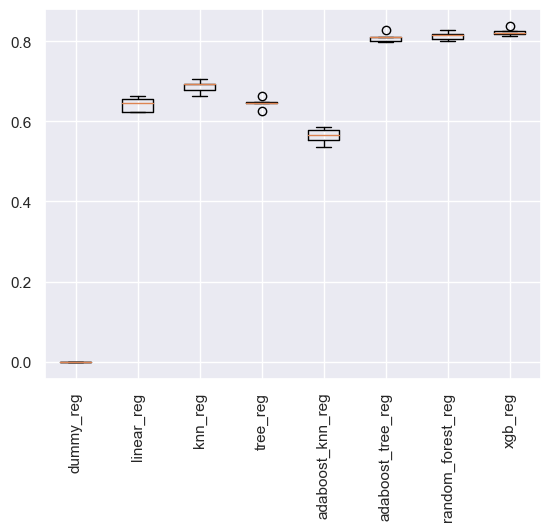

CPU times: total: 18min 52s
Wall time: 20min 27s


In [5]:
%%time
# Compare different models:
%run "./helpers/validate_model.py";
results = compare_models(
    X_train,
    y_train,
    r2,
    cv=3,
    dummy_reg=DummyRegressor(),
    linear_reg=LinearRegression(),
    knn_reg=KNeighborsRegressor(),
    tree_reg=DecisionTreeRegressor(),
    adaboost_knn_reg=AdaBoostRegressor(KNeighborsRegressor()),
    adaboost_tree_reg=AdaBoostRegressor(DecisionTreeRegressor()),
    random_forest_reg=RandomForestRegressor(),
    xgb_reg = XGBRegressor()
);